In [2]:
import numpy as np
import pandas as pd 
import networkx as nx 
import stats
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [3]:
files = stats.get_files("data/graphs")[:-1]
files = [file for file in files if file.endswith("_06") or file.endswith("_12")]
files

['2001_06',
 '2001_12',
 '2002_06',
 '2002_12',
 '2003_06',
 '2003_12',
 '2004_06',
 '2004_12',
 '2005_06',
 '2005_12',
 '2006_06',
 '2006_12',
 '2007_06',
 '2007_12',
 '2008_06',
 '2008_12',
 '2009_06',
 '2009_12',
 '2010_06',
 '2010_12',
 '2011_06',
 '2011_12',
 '2012_06',
 '2012_12',
 '2013_06',
 '2013_12',
 '2014_06',
 '2014_12',
 '2015_06',
 '2015_12',
 '2016_06',
 '2016_12']

In [4]:
# mG = stats.filter_graph(G,"gender","male")
# fG = stats.filter_graph(G,"gender","female")

In [5]:
# stats.network_size(mG)

In [6]:
# stats.network_size(fG)

In [7]:
# lst = []
# for file in files:
#     G = nx.read_gpickle("data/graphs"+"/"+file)
#     mG = stats.filter_graph(G,"gender","male")
#     fG = stats.filter_graph(G,"gender","female")
#     sub =[file,stats.network_size(fG), stats.network_size(mG)]
#     lst.append(sub)
    
# df = pd.DataFrame(lst)

In [8]:
# df.columns = ["file","f_nodes","m_nodes"]
# df

In [9]:
def save_network_size(files, path_save):
    """ Returns a dataframe with two columns, one with the number of female nodes
        and one with the number of male nodes. 
        Input parameters: 
        1. files - pickled network files
        2. path_save - directory where the dataframe with node counts should be saved
    """
    lst = []
    for file in files:
        G = nx.read_gpickle("data/graphs"+"/"+file)
#         print("read")
        mG = stats.filter_graph(G,"gender","male")
        fG = stats.filter_graph(G,"gender","female")
        sub =[file,stats.network_size(fG), stats.network_size(mG)]
        lst.append(sub)

    df = pd.DataFrame(lst)
    df.columns = ["file","f_nodes","m_nodes"]
    df.to_json(path_save)
    print("Saved to: ", path_save)
    return df

In [10]:
def save_network_size_per(attribute, value, files, path_save):
    """ Returns a dataframe with two columns, one with the number of female nodes
        and one with the number of male nodes. However, the networks are filtered by
        a specified attribute.
        Input parameters:
        1. attribute - name of the attribute
        2. value - value of attribute to which the graph is filtered  
        3. files - pickled network files
        4. path_save - directory where the dataframe with node counts should be saved
        
    """
    lst = []
    for file in files:
        G = nx.read_gpickle("data/graphs"+"/"+file)
        mG = stats.filter_graph(G,"gender","male")
        mG = stats.filter_graph(mG,attribute, value)
        fG = stats.filter_graph(G,"gender","female")
        fG = stats.filter_graph(fG,attribute, value)
        sub =[file,stats.network_size(fG), stats.network_size(mG)]
        lst.append(sub)

    df = pd.DataFrame(lst)
    df.columns = ["file","f_nodes","m_nodes"]
    df.to_json(path_save)
    print("Saved to: ", path_save)
    return df

In [11]:
def plot_genders(df, name ,scale):
    """ Plots number of male and female nodes through time. 
        Saves a figure in "plots/network_size{sufix} directory with a specified name"
        Input parameters:
        1. df - dataframe with numbers of male/female nodes
        2. name - sufix which is added to the path
        3. scale - log or linear for y axis
    """
    m_nodes = df.m_nodes.values
    f_nodes = df.f_nodes.values
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1,33),m_nodes,marker=">", label="male")
    plt.plot(np.arange(1,33),f_nodes, marker="X",label="female")
    plt.legend(loc='upper left')
    plt.yscale(scale)
    plt.xlabel("year_month")
    ax.set_xticklabels(['2001_06','2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
    ax.set_xticks(np.arange(1,33,1),minor=True)
    plt.ylabel("number of politicians")
    fig.savefig("plots/network_size_"+name)
    plt.show()

In [12]:
def plot_gender_ratio(df,name):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1,33),stats.male_to_female_ratio(df),marker="o", label="ratio",color="black")
    plt.legend(loc='upper right')
    plt.ylim([0,30])
    plt.yscale('linear')
    plt.xlabel("year_month")
    ax.set_xticklabels(['2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
    ax.set_xticks(np.arange(1,33,1),minor=True)
    plt.ylabel("male to female ratio")
    fig.savefig("plots/ratio_"+name)
    plt.show()

In [13]:
net_size = save_network_size(files, "data/stats/net_size.json")
# net_size = pd.read_json("data/stats/net_size.json")
# pd.read_pickle("data/graphs/2001_06")

Saved to:  data/stats/net_size.json


In [14]:
ns_de = save_network_size_per("nationality", "german", files, "data/stats/net_size_ger.json")
ns_us = save_network_size_per("nationality", "american", files, "data/stats/net_size_us.json")
ns_ru = save_network_size_per("nationality", "russian", files, "data/stats/net_size_ru.json")
ns_gb = save_network_size_per("nationality", "british", files, "data/stats/net_size_gb.json")
ns_fr = save_network_size_per("nationality", "french", files, "data/stats/net_size_fr.json")
# ns_de = pd.read_json("data/stats/net_size_ger.json").sort_values("file")
# ns_us = pd.read_json("data/stats/net_size_us.json").sort_values("file")
# ns_ru = pd.read_json("data/stats/net_size_ru.json").sort_values("file")
# ns_gb = pd.read_json("data/stats/net_size_gb.json").sort_values("file")
# ns_fr = pd.read_json("data/stats/net_size_fr.json").sort_values("file")

Saved to:  data/stats/net_size_ger.json
Saved to:  data/stats/net_size_us.json
Saved to:  data/stats/net_size_ru.json
Saved to:  data/stats/net_size_gb.json
Saved to:  data/stats/net_size_fr.json


In [15]:
# nets = [net_size, net_size_de, net_size_fr, net_size_gb, net_size_ru, net_size_us]
# names = ["all","de","fr","gb","ru","us"]

In [16]:
# i = 0
# for net in nets:
#     print(names[i])
#     plot_genders(net,names[i]+"_log","log")
#     i = i +1

In [17]:
# i = 0
# for net in nets:
#     print(names[i])
#     plot_genders(net,names[i],"linear")
#     i = i +1

In [18]:
# plot_gender_ratio(net_size,"all")

In [21]:
# plot_gender_ratio(net_size_de,"de")
# plot_gender_ratio(net_size_us,"us")
# plot_gender_ratio(net_size_gb,"gb")
# plot_gender_ratio(net_size_fr,"fr")
# plot_gender_ratio(net_size_ru,"ru")

In [12]:
def plot_size_ratio(df, title, path_save,scale="linear"):
    fig,ax = plt.subplots(figsize=(16,12))
    m_nodes = df.m_nodes.values
    f_nodes = df.f_nodes.values
    
    ###### subplot
    left, bottom, width, height = [0.18, 0.60, 0.25, 0.25]
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.plot(np.arange(1,33),stats.male_to_female_ratio(df),marker="o", label="ratio",color="black")
#     ax2.set_legend(loc='upper right')
    ax2.set_ylim([0,0.2])
    ax2.set_yscale('linear')
    ax2.set_xlabel("year and month", fontsize=13)
    ax2.set_xticklabels(['2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
#     ax2.set_xticks(np.arange(1,33,1),minor=True)
    ax2.set_ylabel("male to female ratio", fontsize=13)
    
    ###### main plot
    ax.plot(np.arange(1,33),m_nodes,marker=">", label="male")
    ax.plot(np.arange(1,33),f_nodes, marker="X",label="female")
    ax.legend(loc='lower right')
    ax.set_yscale(scale)
    ax.set_xlabel("year_month", fontsize=20)
    ax.set_xticklabels(['2001_06','2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
    ax.set_xticks(np.arange(1,33,1),minor=True)
    ax.set_ylabel("number of politicians", fontsize=20)
    ax.set_title(title, fontsize=33)
    path = path_save+"/"+title+".png"
    plt.savefig(path)
#     plt.show()

In [11]:
# nets = [net_size, net_size_de, net_size_fr, net_size_gb, net_size_ru, net_size_us]
# names = ["all","de","fr","gb","ru","us"]
# ratio_all = stats.male_to_female_ratio(net_size)
# ratio_de = stats.male_to_female_ratio(net_size_de)
# ratio_fr = stats.male_to_female_ratio(net_size_fr)
# ratio_gb = stats.male_to_female_ratio(net_size_gb)
# ratio_ru = stats.male_to_female_ratio(net_size_ru)
# ratio_us = stats.male_to_female_ratio(net_size_us)

# ratio_df = pd.DataFrame({
#     'all': ratio_all,
#     'de': ratio_de,
#     'fr': ratio_fr,
#     'gb': ratio_gb,
#     'ru': ratio_ru,
#     'us': ratio_us
# })

# ratio_df.to_json("data/stats/ratio.json")

In [74]:
path = "plots/network_size/"
plot_size_ratio(net_size, "Global",path)
plot_size_ratio(ns_ru, "Russia",path)
plot_size_ratio(ns_us, "USA",path)
plot_size_ratio(ns_de, "Germany",path)
plot_size_ratio(ns_fr, "France",path)
plot_size_ratio(ns_gb, "Great Britain",path)

C:\Users\vujovisn\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [76]:
def plot_multi_ratio(df_dict, title, path_save,scale="linear"):
    df = df_dict
    fig,ax = plt.subplots(figsize=(16,12))
    m_nodes = df['all'].m_nodes.values
    f_nodes = df['all'].f_nodes.values
    
    ###### subplot
    left, bottom, width, height = [0.18, 0.55, 0.30, 0.30]
    ax2 = fig.add_axes([left, bottom, width, height])
    ### unpack df_dict
    ax2.plot(np.arange(1,33),stats.male_to_female_ratio(df['all']),marker="o", label="Global",color="black")
    ax2.plot(np.arange(1,33),stats.male_to_female_ratio(df['us']),marker="*", label="US",color="red")
    ax2.plot(np.arange(1,33),stats.male_to_female_ratio(df['fr']),marker="*", label="FRA",color="blue")
    ax2.plot(np.arange(1,33),stats.male_to_female_ratio(df['de']),marker="*", label="GER",color="orange")
    ax2.plot(np.arange(1,33),stats.male_to_female_ratio(df['ru']),marker="*", label="RUS",color="green")
    ax2.plot(np.arange(1,33),stats.male_to_female_ratio(df['gb']),marker="*", label="GB",color="gray")
#     ax2.set_legend(loc='upper right')
    ax2.set_ylim([0,0.2])
    ax2.set_yscale('linear')
    ax2.set_xlabel("year and month", fontsize=15)
    ax2.set_xticklabels(['2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
#     ax2.set_xticks(np.arange(1,33,1),minor=True)
    ax2.set_ylabel("female to male ratio", fontsize=15)
    ax2.set_xticks(np.arange(1,33,1),minor=True)
    ax2.legend(loc='lower right', fontsize=10)
    
    ###### main plot
    ax.plot(np.arange(1,33),m_nodes,marker=">", label="male")
    ax.plot(np.arange(1,33),f_nodes, marker="X",label="female")
    ax.legend(loc='lower right', fontsize=16)
    ax.set_yscale(scale)
    ax.set_xlabel("year_month", fontsize=22)
    ax.set_xticklabels(['2001_06','2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
    ax.set_xticks(np.arange(1,33,1),minor=True)
    ax.set_ylabel("number of politicians", fontsize=22)
    ax.set_title(title, fontsize=33)
    path = path_save+"/"+title+".png"
    plt.savefig(path)
#     plt.show()

In [21]:
path = "plots/network_size/"
df_dict = {
    'all': net_size,
    'us': ns_us,
    'de': ns_de,
    'gb': ns_gb,
    'ru': ns_ru,
    'fr': ns_fr
}

In [78]:
plot_multi_ratio(df_dict, "Network size and ratio (Global, US, FRA, GER, RUS, GB)", path)

In [65]:
def plot_multi_ratio_flip(df_dict, title, path_save,scale="linear"):
    df = df_dict
    fig,ax = plt.subplots(figsize=(20,14))
    m_nodes = df['all'].m_nodes.values
    f_nodes = df['all'].f_nodes.values
    
    ###### main plot
    left, bottom, width, height = [0.6, 0.2, 0.25, 0.25]
    ax2 = fig.add_axes([left, bottom, width, height])
    ### unpack df_dict
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['all']),marker="o", label="Global",color="black")
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['us']),marker="*", label="US",color="red")
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['fr']),marker="*", label="FRA",color="blue")
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['de']),marker="*", label="GER",color="orange")
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['ru']),marker="*", label="RUS",color="green")
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['gb']),marker="*", label="GB",color="gray")
#     ax2.set_legend(loc='upper right')
    ax.set_ylim([0,0.18])
    ax.set_yscale('linear')
    ax.set_xlabel("year and month", fontsize=22)
    ax.set_xticklabels(['2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
#     ax2.set_xticks(np.arange(1,33,1),minor=True)
    ax.set_ylabel("female to male ratio", fontsize=22)
    ax.set_xticks(np.arange(1,33,1),minor=True)
    ax.legend(loc='lower left', fontsize=15)
    
    ###### subplot
    ax2.plot(np.arange(1,33),m_nodes,marker=">", label="male")
    ax2.plot(np.arange(1,33),f_nodes, marker="X",label="female")
    ax2.legend(loc='upper left', fontsize=14)
    ax2.set_yscale(scale)
    ax2.set_xlabel("year_month", fontsize=15)
    ax2.set_xticklabels(['2001_06','2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
    ax2.set_xticks(np.arange(1,33,1),minor=True)
    ax2.set_ylabel("number of politicians", fontsize=15)
    ax.set_title(title, fontsize=33)
    path = path_save+"/"+title+".png"
    plt.savefig(path)
    plt.show()

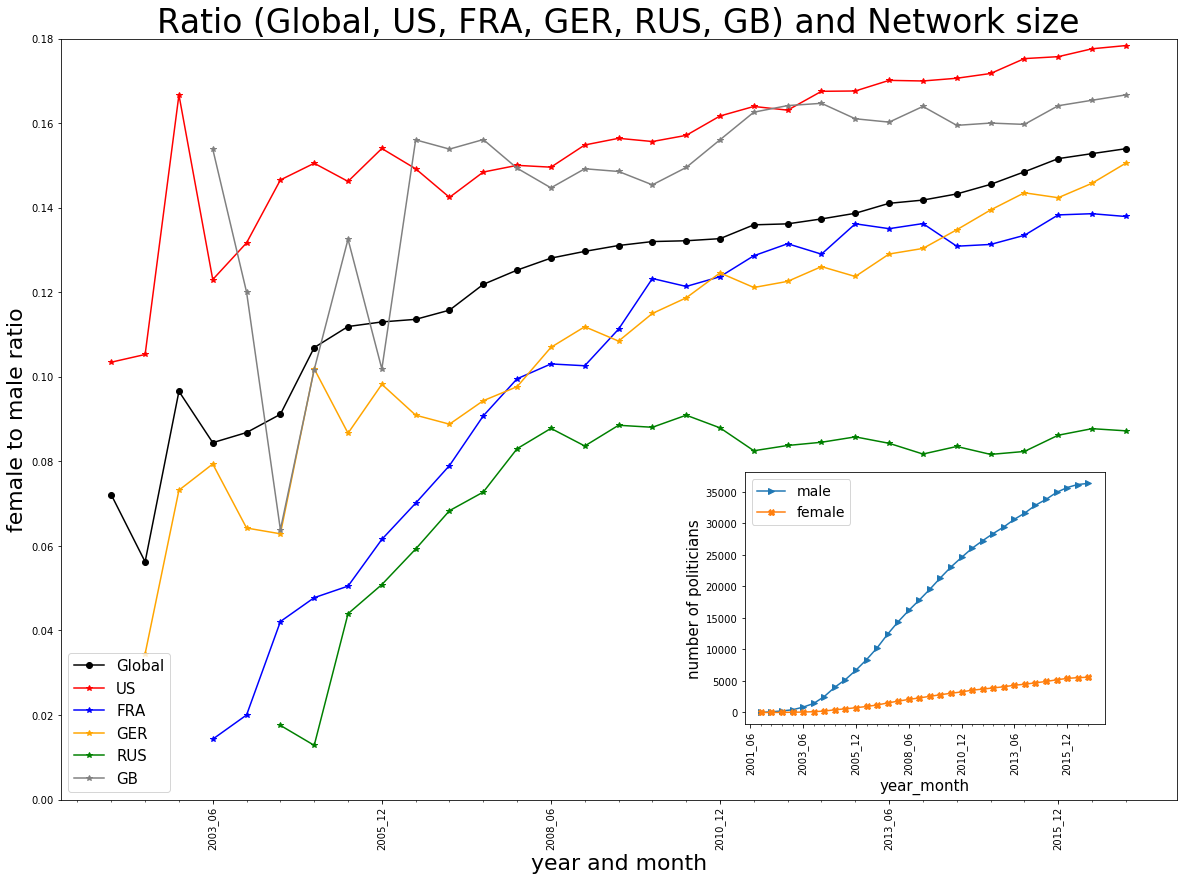

In [67]:
plot_multi_ratio_flip(df_dict, "Ratio (Global, US, FRA, GER, RUS, GB) and Network size", path)

In [229]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

In [360]:
def plot_multi_ratio_flip(df_dict, title, path_save,scale="linear"):
    df = df_dict
    fig,ax = plt.subplots(figsize=(20,14))
    m_nodes = df['all'].m_nodes.values
    f_nodes = df['all'].f_nodes.values
    
    ###### main plot
    left, bottom, width, height = [0.625, 0.24, 0.3, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    ### unpack df_dict
    lw = 1.0
    lwg = 3.0
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['all']),marker="o", label="Global",color="black"
            ,linewidth = lwg)
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['us']),marker="*", label="US",color="red"
            ,linewidth = lw)
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['fr']),marker="*", label="FRA",color="blue"
            ,linewidth = lw)
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['de']),marker="*", label="GER",color="orange"
            ,linewidth = lw)
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['ru']),marker="*", label="RUS",color="green"
            ,linewidth = lw)
    ax.plot(np.arange(1,33),stats.male_to_female_ratio(df['gb']),marker="*", label="GB",color="gray"
            ,linewidth = lw)
#     ax2.set_legend(loc='upper right')
    ax.set_ylim([0,0.18])
    ax.set_yscale('linear')
    
    ## labels for y and x
    ax.set_xlabel("Year and month", fontsize=36, weight='bold')
    ax.set_ylabel("Female to male ratio", fontsize=36, weight='bold')
    ## legend and title
    ax.legend(loc='lower left', fontsize=20)
    ax.set_title(title, fontsize=40, weight='bold')
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    ## x-tick labels 
    ax.set_xticklabels(['2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],
                       rotation=50,fontsize=16)
    ax.set_xticks(np.arange(1,33,1),minor=True)
    ## ticks for y and x 
    ax.tick_params(labelsize=30, length=13, width=4, direction='inout')
    ax.tick_params(which='minor', length=6, width=3, direction='inout')

    
    ###### subplot
    ax2.plot(np.arange(1,33),m_nodes,marker=">", label="male")
    ax2.plot(np.arange(1,33),f_nodes, marker="X",label="female")
    ## legend
    ax2.legend(loc='upper left', fontsize=20)
    ## scale
    ax2.set_yscale(scale)
    ## x-tick labels
    ax2.set_xticklabels(['6.01','6.01','6.03','12.05','6.08','12.10','6.13','12.15']
                        ,rotation=50)
    ax2.set_xticks(np.arange(1,33,1),minor=True)
    ax2.set_ylabel("Number of politicians", fontsize=26, weight='bold')
    
    ## ticks for y and x 
    ax2.tick_params(labelsize=20, length=6, width=2, direction='inout')
    ax2.tick_params(which='minor', length=3, width=1, direction='inout')

    path = path_save+"/"+title+".png"
    plt.tight_layout()
#     plt.subplots_adjust(bottom=0.15)
    plt.savefig(path)
    plt.show()

C:\Users\vujovisn\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


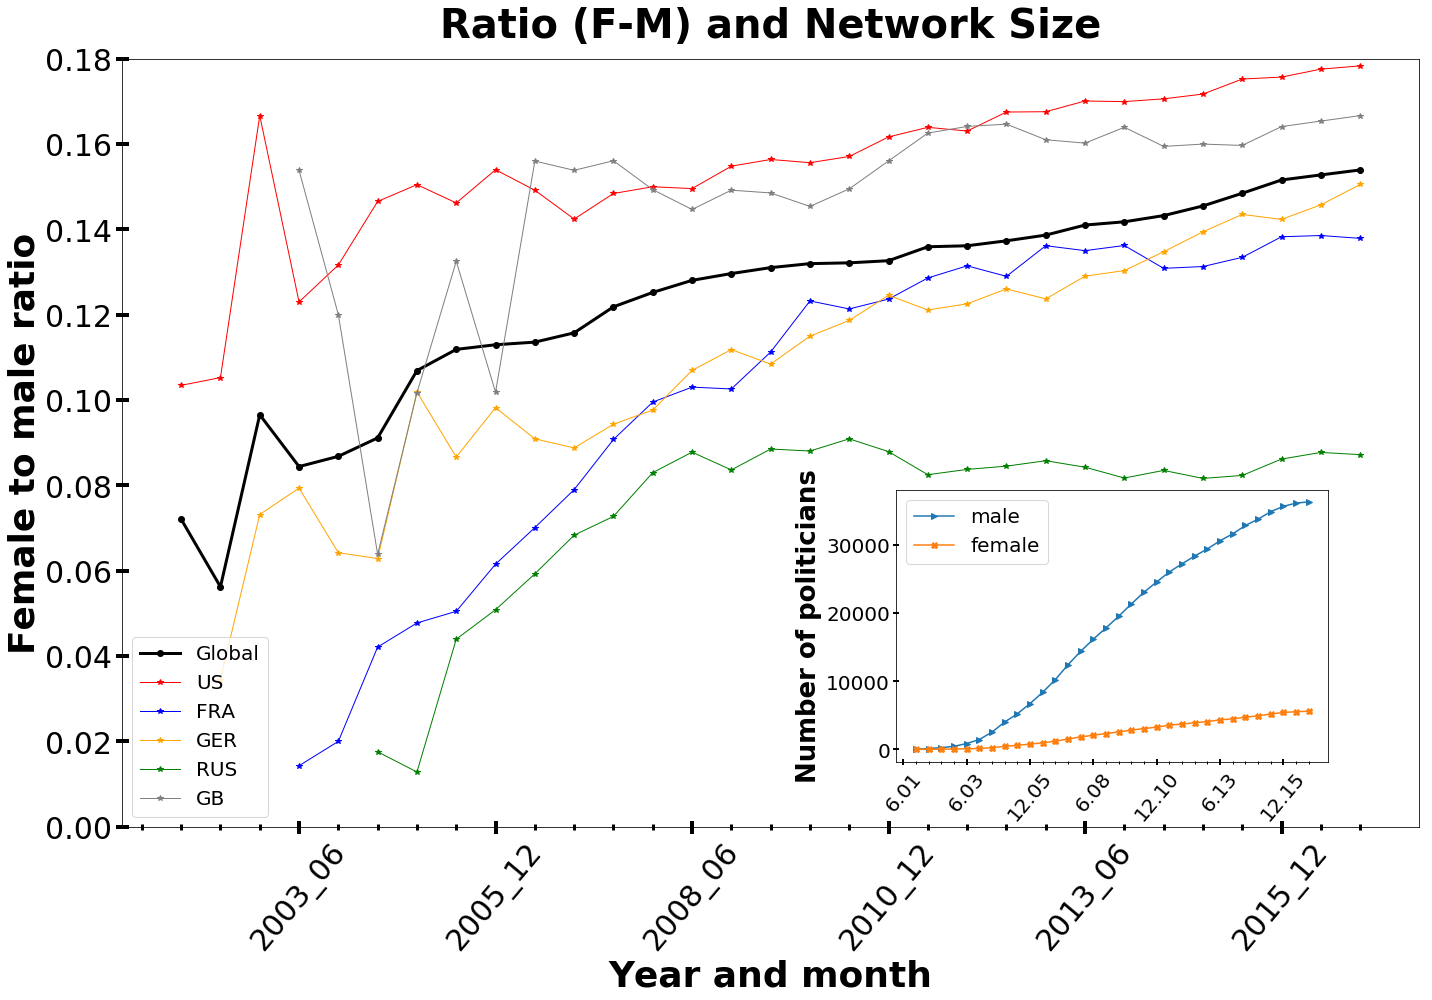

In [361]:
plot_multi_ratio_flip(df_dict, "Ratio (F-M) and Network Size", path)